<a href="https://colab.research.google.com/github/JahnaviPonna/AI-Based-Resume-Screening-Assistant/blob/main/GEN_AI_Resume_Screening_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U PyPDF2 sentence-transformers pandas matplotlib


In [ ]:
# !pip install fuzzywuzzy[speedup]


In [ ]:
import os
# import re
import PyPDF2
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
from google.colab import files


In [ ]:
uploaded = files.upload()

def extract_text_from_pdf(file_path):
    text = ''
    with open(file_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            content = page.extract_text()
            if content:
                text += content + " "
    return text.strip()

resume_data = []

for file_name in uploaded:
    if file_name.lower().endswith('.pdf'):
        text = extract_text_from_pdf(file_name)
        resume_data.append({
            'filename': file_name,
            'content': text
        })

df = pd.DataFrame(resume_data)



Saving Jahnavi's Resume-hackerresume.pdf to Jahnavi's Resume-hackerresume (1).pdf
Saving Varshitha Yadlapalli_CV.pdf to Varshitha Yadlapalli_CV (1).pdf
Saving AlgoUniversity_hemanth_Resume_Template__1___Copy___Copy_.pdf to AlgoUniversity_hemanth_Resume_Template__1___Copy___Copy_ (1).pdf
Saving Rahul_Resume.pdf to Rahul_Resume (1).pdf


In [ ]:
job_roles = {
    "Software Developer": "Java, C++, Python, software engineering, APIs, backend, frontend, frameworks",
    "Data Scientist": "machine learning, pandas, statistics, Python, data analysis, visualization, models",
    "Web Developer": "HTML, CSS, JavaScript, React, Node.js, web design, responsive layout",
    "AI/ML Engineer": "deep learning, PyTorch, TensorFlow, model training, AI projects",
    "UI/UX Designer": "Figma, Adobe XD, wireframes, user experience, prototyping, visual design",
    "Cybersecurity Analyst": "penetration testing, firewalls, encryption, ethical hacking, risk analysis",
    "Embedded Engineer": "microcontrollers, Arduino, embedded C, sensors, real-time systems",
    "VLSI Design Engineer": "Verilog, VHDL, ASIC, FPGA, synthesis, layout, chip design",
    "Mechanical Engineer": "CAD, SolidWorks, thermodynamics, mechanical design, manufacturing",
    "Electrical Engineer": "circuit analysis, MATLAB, power systems, signal processing",
    "Electronic Engineer": "digital circuits, semiconductors, embedded systems, PCB design",
    "Software Tester": "manual testing, automation, Selenium, JUnit, bug reports",
    "Chip Designer": "logic synthesis, physical design, layout, RTL coding, DFT",
    "Ethical Hacker": "penetration testing, cybersecurity tools, network scanning, vulnerability testing",
    "Network Engineer": "routers, switches, subnetting, network setup, protocols",
    "Database Administrator": "MySQL, PostgreSQL, database design, indexing, queries, backups",
    "Systems Analyst": "requirements analysis, process modeling, system specs, IT solutions",
    "Technical Consultant": "IT advisory, solution design, client engagement, enterprise systems",
    "Business Analyst": "business requirements, stakeholder analysis, process optimization, documentation",
    "Quality Assurance Engineer": "QA testing, test plans, automation, validation",
    "DevOps Engineer": "CI/CD, Jenkins, Docker, Kubernetes, version control, automation",
    "Cloud Engineer": "AWS, Azure, GCP, cloud architecture, deployment",
    "Data Analyst": "data cleaning, Excel, SQL, visualization, business insights",
    "Research Scientist": "literature review, experiments, scientific method, publication, analysis",
    "Technical Writer": "documentation, user manuals, API docs, clear writing",
    "Sales Engineer": "client demos, product knowledge, tech specs, sales cycle",
    "Field Engineer": "on-site setup, troubleshooting, technical support",
    "Operations Manager": "logistics, workflows, efficiency, process improvement",
    "Supply Chain Manager": "inventory, procurement, distribution, demand planning",
    "Consultant": "strategic advisory, domain expertise, transformation, analysis",
    "Entrepreneur": "startup, product development, pitching, growth, leadership",
    "Professor/Educator": "teaching, curriculum, mentoring, academic projects"
}


# def generate_prompt(resume_text):
#     prompt = f"""
# You are an AI assistant trained to classify resumes into job categories. Classify the following resume into **one of the roles below**, based on skills, projects, experience, and education.

# Job Categories:
# - Software Developer
# - Machine Learning Engineer
# - Data Scientist
# - Full Stack Developer
# - Frontend Developer
# - Backend Developer
# - Embedded Systems Engineer
# - Electrical Engineer
# - Electronics Engineer
# - UI/UX Designer
# - Cybersecurity Analyst
# - HR Manager
# - Systems Analyst
# - Database Administrator
# - DevOps Engineer
# - Cloud Engineer
# - Research Scientist
# - Entrepreneur
# - Educator/Professor
# - Business Analyst

# Respond with **only one most suitable role**. No explanations.

# Resume:
# \"\"\"
# {resume_text[:5000]}
# \"\"\"
# """
#     return prompt


In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

role_embeddings = {role: model.encode(desc, convert_to_tensor=True) for role, desc in job_roles.items()}


In [ ]:
# def classify_resume(text):
#     resume_embedding = model.encode(text[:6000], convert_to_tensor=True)  # Use first 3000 chars
#     similarities = {
#         role: util.cos_sim(resume_embedding, embedding).item()
#         for role, embedding in role_embeddings.items()
#     }
#     best_match = max(similarities, key=similarities.get)
#     return best_match

# df['category'] = df['content'].apply(classify_resume)


#**Use this part for model if the below 3rd one doesn't works out**

# def classify_resume(text):
#     text = text[:6000]  # Limit to avoid long texts
#     resume_embedding = model.encode(text, convert_to_tensor=True)
#     similarities = {
#         role: util.cos_sim(resume_embedding, embedding).item()
#         for role, embedding in role_embeddings.items()
#     }
#     return max(similarities, key=similarities.get)

# df['category'] = df['content'].apply(classify_resume)


def classify_resume_with_reason(text):
    text = text[:6000].lower()
    resume_embedding = model.encode(text, convert_to_tensor=True)
    similarities = {}
    match_keywords = {}

    for role, desc in job_roles.items():
        embedding = role_embeddings[role]
        sim_score = util.cos_sim(resume_embedding, embedding).item()
        similarities[role] = sim_score

        # Match keywords (for explanation)
        keywords = [kw.strip().lower() for kw in desc.split(',')]
        from fuzzywuzzy import fuzz
        matched = [kw for kw in keywords if fuzz.partial_ratio(kw, text) > 85]


        match_keywords[role] = matched

    best_role = max(similarities, key=similarities.get)
    rationale = f"Matched terms: {', '.join(match_keywords[best_role])}" if match_keywords[best_role] else "No specific terms matched"
    return best_role, rationale


In [ ]:
# from fuzzywuzzy import fuzz

# def extract_matched_keywords(text, keywords, threshold=80):
#     text = text.lower()
#     matched = []
#     for kw in keywords:
#         kw_clean = kw.strip().lower()
#         # Check if any word or phrase in the resume closely matches the keyword
#         for word in text.split():
#             if fuzz.partial_ratio(kw_clean, word) >= threshold:
#                 matched.append(kw)
#                 break  # Found match for this keyword, move to next
#     return list(set(matched))  # remove duplicates


In [ ]:
# for i, row in df.iterrows():
#     print(f"✅ '{row['filename']}' classified as ➤ {row['category']}")


df[['category', 'rationale']] = df['content'].apply(lambda text: pd.Series(classify_resume_with_reason(text)))

for i, row in df.iterrows():
    print(f"✅ '{row['filename']}' classified as ➤ {row['category']}")
    print(f"   🔎 Reason: {row['rationale']}\n")


✅ 'Jahnavi's Resume-hackerresume (1).pdf' classified as ➤ Systems Analyst
   🔎 Reason: No specific terms matched

✅ 'Varshitha Yadlapalli_CV (1).pdf' classified as ➤ Electrical Engineer
   🔎 Reason: No specific terms matched

✅ 'AlgoUniversity_hemanth_Resume_Template__1___Copy___Copy_ (1).pdf' classified as ➤ Software Developer
   🔎 Reason: No specific terms matched

✅ 'Rahul_Resume (1).pdf' classified as ➤ Electronic Engineer
   🔎 Reason: No specific terms matched



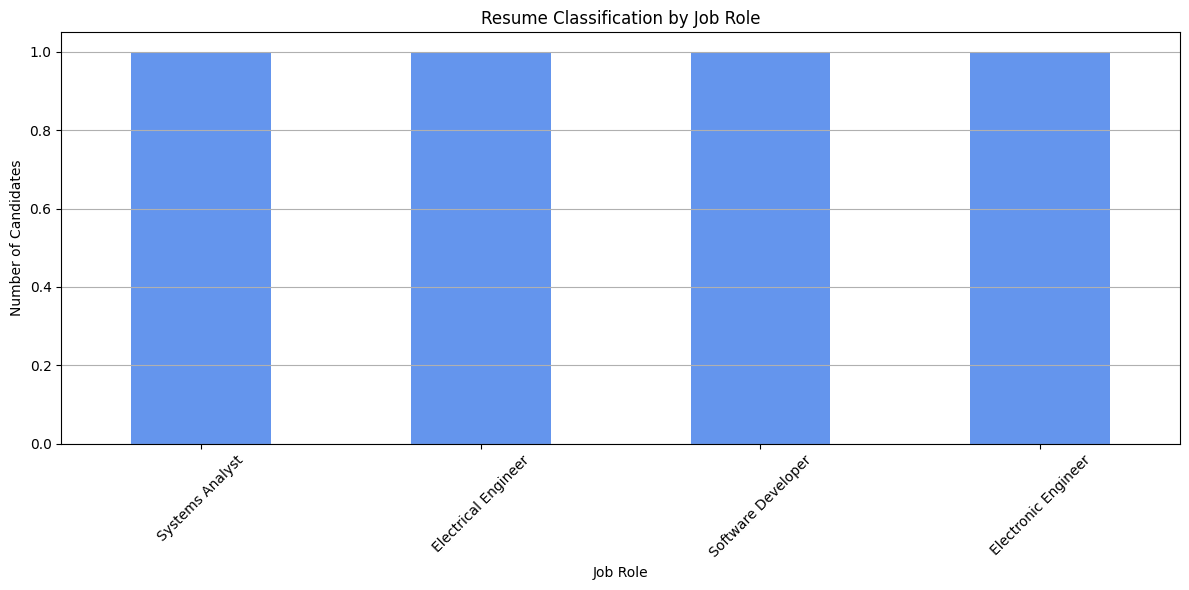

In [ ]:
plt.figure(figsize=(12, 6))
df['category'].value_counts().plot(kind='bar', color='cornflowerblue')
plt.title("Resume Classification by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Number of Candidates")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
df[['filename', 'category']].to_csv('resume_classification_report.csv', index=False)
files.download('resume_classification_report.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# def classify_resume_with_reason(text):
#     prompt = generate_explained_prompt(text)

#     response = model.generate_content(prompt)
#     output = response.text.strip()

#     # Split Category and Rationale
#     if "Rationale:" in output:
#         category = output.split("Rationale:")[0].replace("Category:", "").strip()
#         rationale = output.split("Rationale:")[1].strip()
#     else:
#         category = "Unknown"
#         rationale = "Could not extract rationale."

#     return category, rationale
